In [1]:
from root import *

### Days of the week VS Trip Duration

In [2]:
dfDaysOfWeekTrips = dfTrip[['duration', 'start_date']]
dfDaysOfWeekTrips = dfDaysOfWeekTrips[(2*60 <= dfDaysOfWeekTrips.duration) & (dfDaysOfWeekTrips.duration <= 6*3600)]
daysOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday\n', 'Friday', 'Saturday', 'Sunday']

In [3]:
dfDaysOfWeekTrips.rename(columns={'start_date':'week_day'}, inplace=True)

In [4]:
dfDaysOfWeekTrips['day_index'] = dfDaysOfWeekTrips.week_day.dt.dayofweek
dfDaysOfWeekTrips.week_day = dfDaysOfWeekTrips.week_day.dt.weekday_name
dfDaysOfWeekTrips.head()

,duration,week_day,day_index
10,125,Thursday,3
11,126,Thursday,3
12,129,Thursday,3
13,130,Thursday,3
14,134,Thursday,3


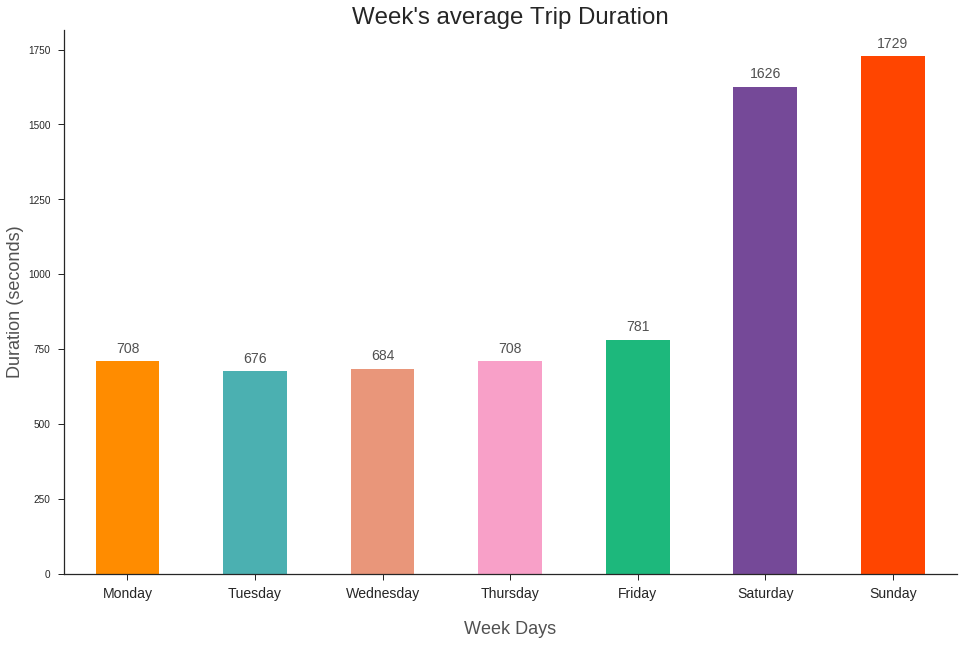

In [5]:
sns.set_style('ticks')
ax = dfDaysOfWeekTrips[['duration', 'day_index']] \
                      .groupby(by=['day_index']) \
                      .agg(['mean', 'count'])['duration']\
                      .rename(columns={'mean':'avg_duration', 'count':'trips'})\
                      .reset_index()\
                      .sort_values(by=['day_index'])\
                      .plot(kind='bar', \
                            x='day_index', \
                            y='avg_duration', \
                            figsize=(16, 10), \
                            legend=False, \
                            rot=0, \
                            color=['#FF8C00', '#4bb0b1', '#E9967A', '#f8a0c8', '#1db87c', '#754998', '#FF4500'])

ax.set_xlabel("Week Days", fontsize=18, alpha=0.8)
ax.set_ylabel("Duration (seconds)", fontsize=18, alpha=0.8)
ax.set_title("Week's average Trip Duration", fontsize=24)
ax.set_xticklabels(daysOfWeek, fontsize=14)
sns.despine()
autolabel(ax, 14, 0.8)
plt.show()

In [6]:
dfGroupedAgg = dfDaysOfWeekTrips[['duration', 'day_index']] \
                                .groupby(by=['day_index']) \
                                .agg(['mean', 'count'])['duration'] \
                                .rename(columns={'mean':'avg_duration', 'count':'trips'}) \
                                .reset_index()
dfGroupedAgg

,day_index,avg_duration,trips
0,0,708.852242,114586
1,1,676.702190,120936
2,2,684.572677,118882
3,3,708.925340,117868
4,4,781.767476,108036
5,5,1626.575057,43740
6,6,1729.155673,37508


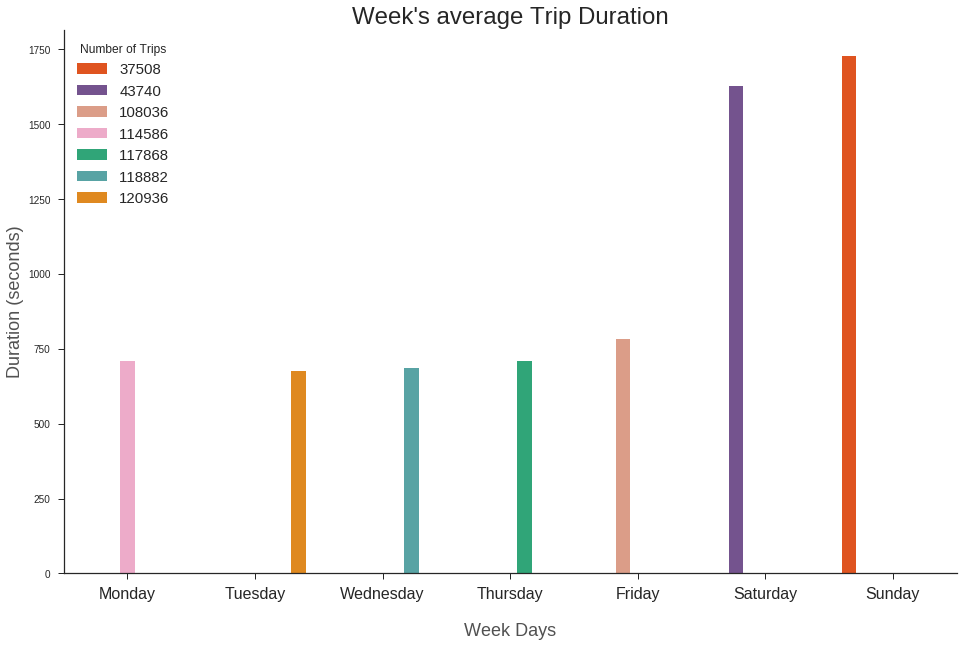

In [7]:
plt.figure(figsize=(16,10));
sns.set_style('ticks')
ax = sns.barplot(data=dfGroupedAgg, \
                 x='day_index', \
                 y='avg_duration', \
                 hue='trips', \
                 palette=['#FF4500', '#754998', '#E9967A', '#f8a0c8', '#1db87c', '#4bb0b1', '#FF8C00'])
                 #palette=sns.color_palette("Reds_d", n_colors=7, desat=1))

ax.set_xlabel("Week Days", fontsize=18, alpha=0.8)
ax.set_ylabel("Duration (seconds)", fontsize=18, alpha=0.8)
ax.set_title("Week's average Trip Duration", fontsize=24)
ax.set_xticklabels(daysOfWeek, fontsize=16)
ax.legend(fontsize=15, loc = "upper left", title = "Number of Trips")
sns.despine()
plt.show()

### Apreciaciones:
+ Se puede observar **claramente** como durante los días de semana la cantidad se mantiene estable en su duración,   esto nos dice mucho acerca del uso de las bicicletas en la semana como medio de transporte para ir a trabajar.
+ Además los días de semana hay **mayor cantidad de viajes que los fines de semana**.
+ Los viernes se observa un leve incremento en las duraciones.
+ En los fines de semana como era de esperar se duplican las duraciones de los viajes, sin embargo no hay que         olvidarse de revisar la cantidad de muestras en estos días para no caer como víctimas de un desafortunado caso de   alta variabilidad por falta de registros.  
  En éste caso, nosotros opinamos que estamos a salvo observando que son solamente 3 veces menores en cantidad que   en el resto de los días.